# TASK #1: PROJECT OVERVIEW

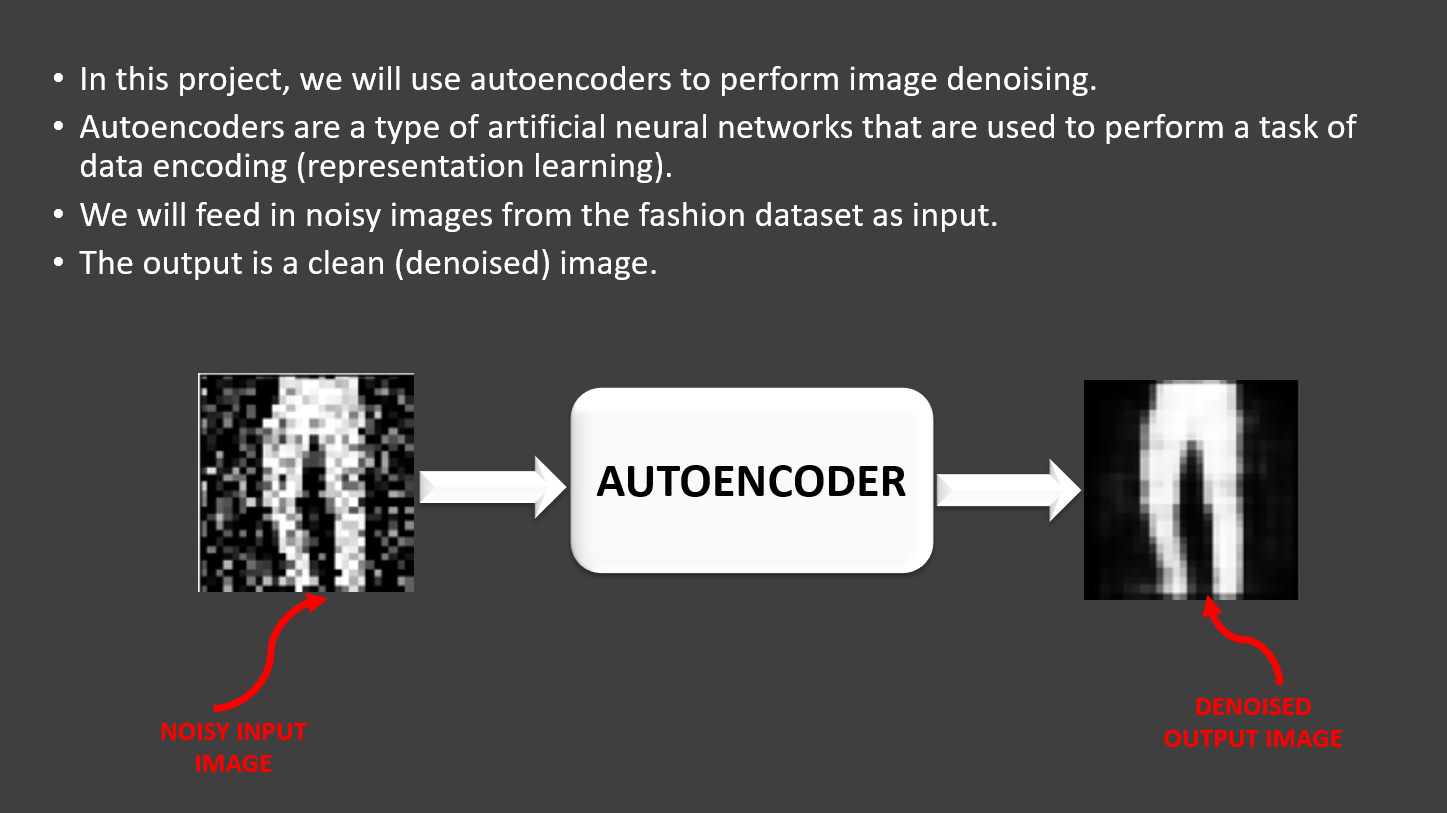

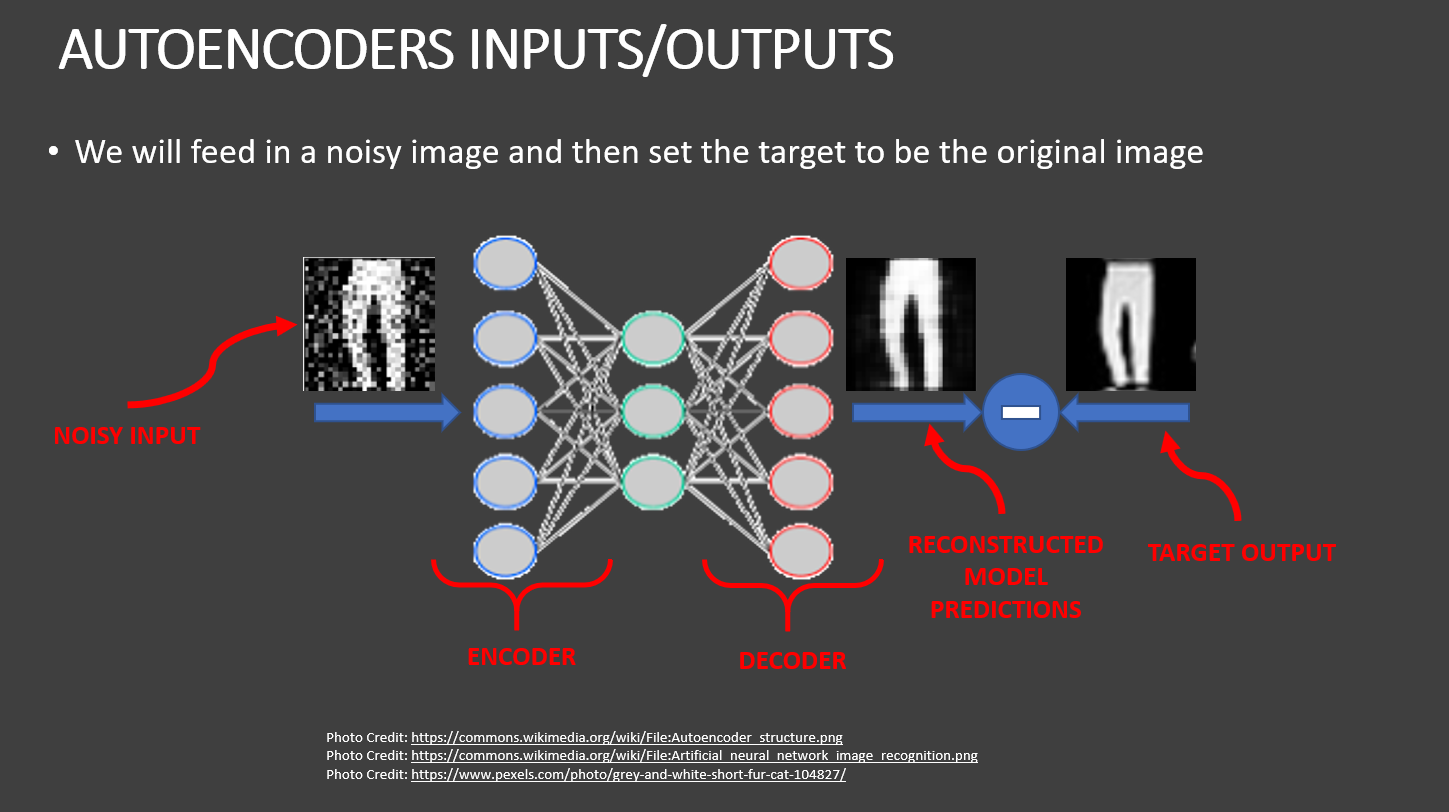

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
# Load dataset 
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

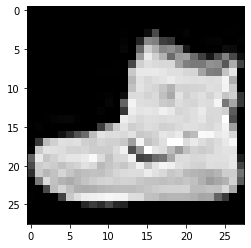

In [3]:
# Visualize a sample image
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [4]:
# check out the shape of the training data
print('Shape of training features and Labels : ',X_train.shape,y_train.shape)

Shape of training features and Labels :  (60000, 28, 28) (60000,)


In [5]:
# check out the shape of the testing data
print('Shape of testing features and Labels : ',X_test.shape,y_test.shape)

Shape of testing features and Labels :  (10000, 28, 28) (10000,)


# TASK #3: PERFORM DATA VISUALIZATION

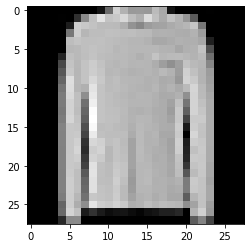

In [6]:
# Let's view some images!
i = random.randint(0,len(X_train))
plt.imshow(X_train[i], cmap='gray')
plt.show()

In [7]:
fashion = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle Boot'}

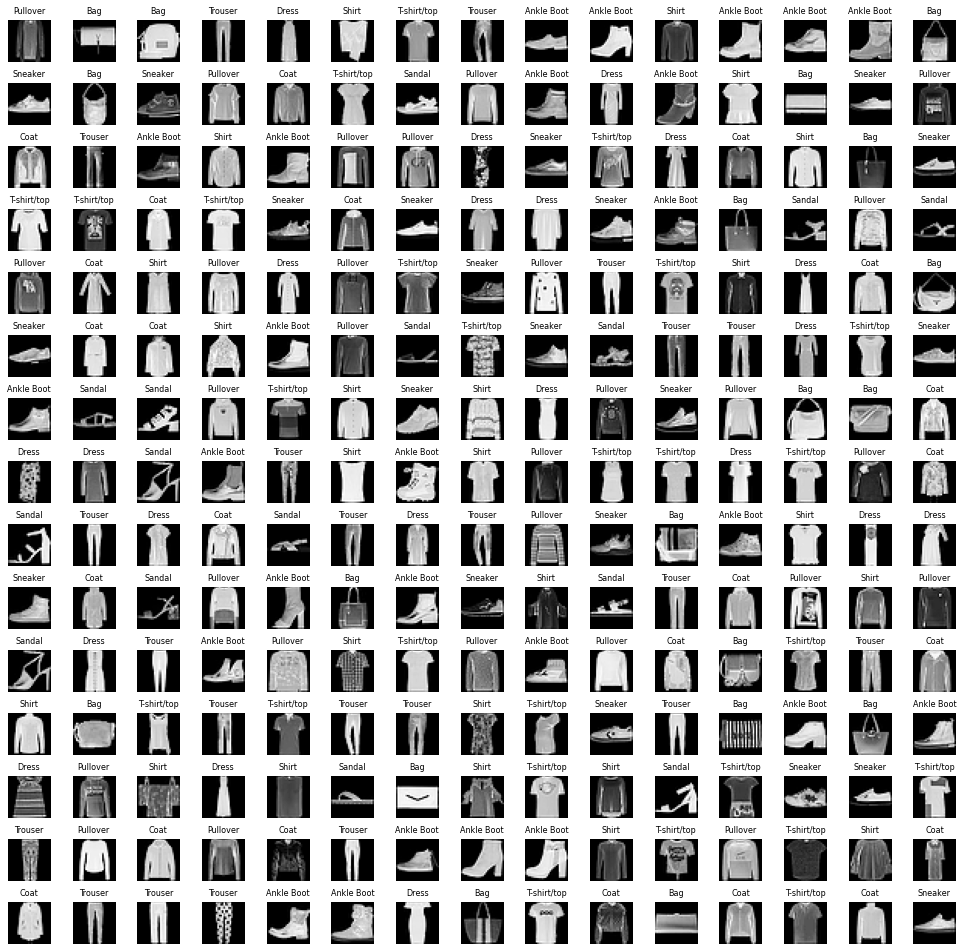

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index= random.randint(0,n_training)
    axes[i].imshow(X_train[index],cmap='gray')
    axes[i].set_title(fashion[y_train[index]],fontsize=8)
    axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)


# TASK #4: PERFORM DATA PREPROCESSING

In [9]:
# normalize data
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
# add some noise
noise_factor = 0.25
noise_dataset = []
for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_dataset.append(noisy_image)
    

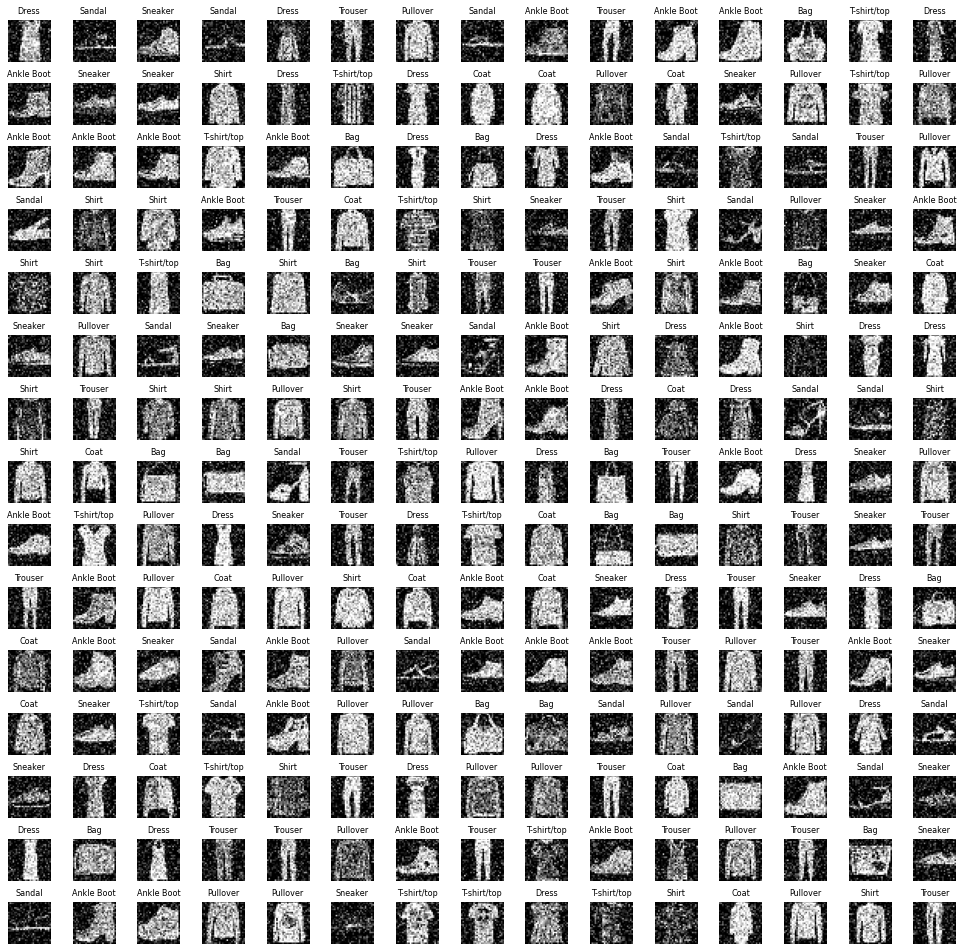

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index= random.randint(0,n_training)
    axes[i].imshow(noise_dataset[index],cmap='gray')
    axes[i].set_title(fashion[y_train[index]],fontsize=8)
    axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [14]:
# add noise to testing dataset
noise_factor = 0.25
noise_dataset_test = []
for img in X_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_dataset_test.append(noisy_image)

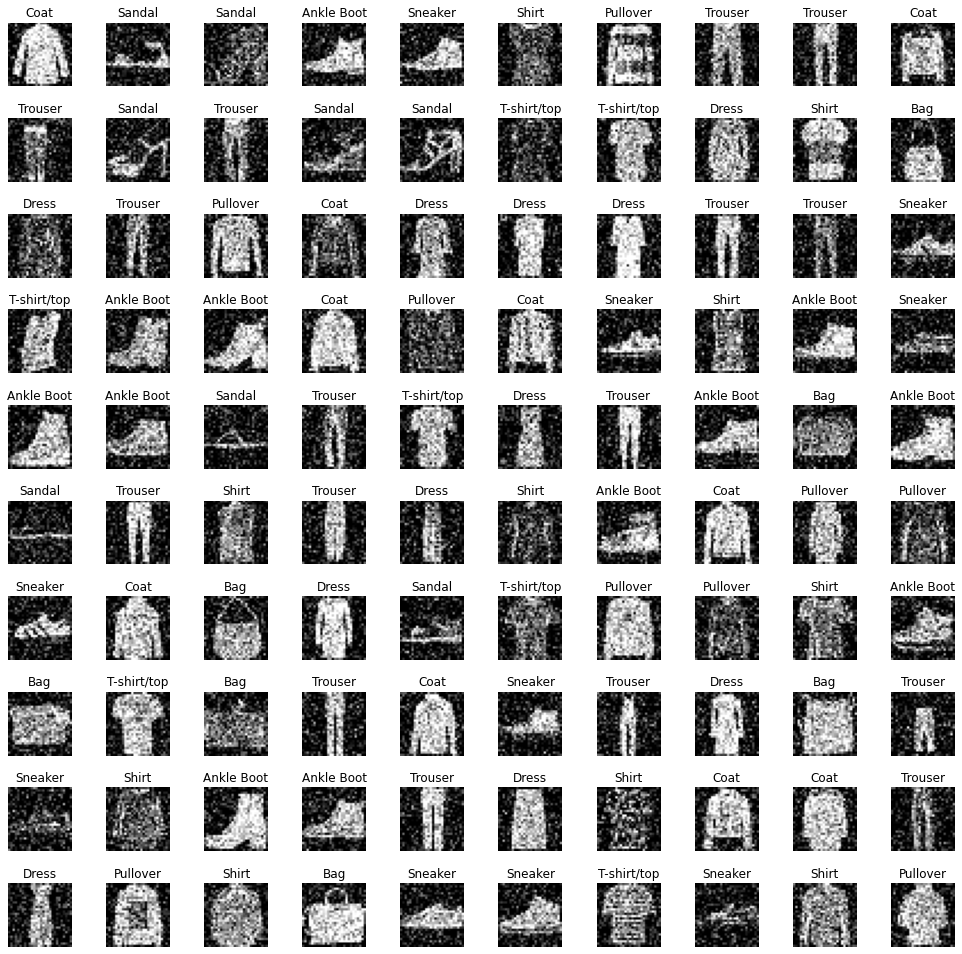

In [15]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_test) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index= random.randint(0,n_training)
    axes[i].imshow(noise_dataset_test[index],cmap='gray')
    axes[i].set_title(fashion[y_test[index]],fontsize=12)
    axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [16]:
noise_dataset = np.array(noise_dataset)

In [17]:
noise_dataset_test = np.array(noise_dataset_test)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

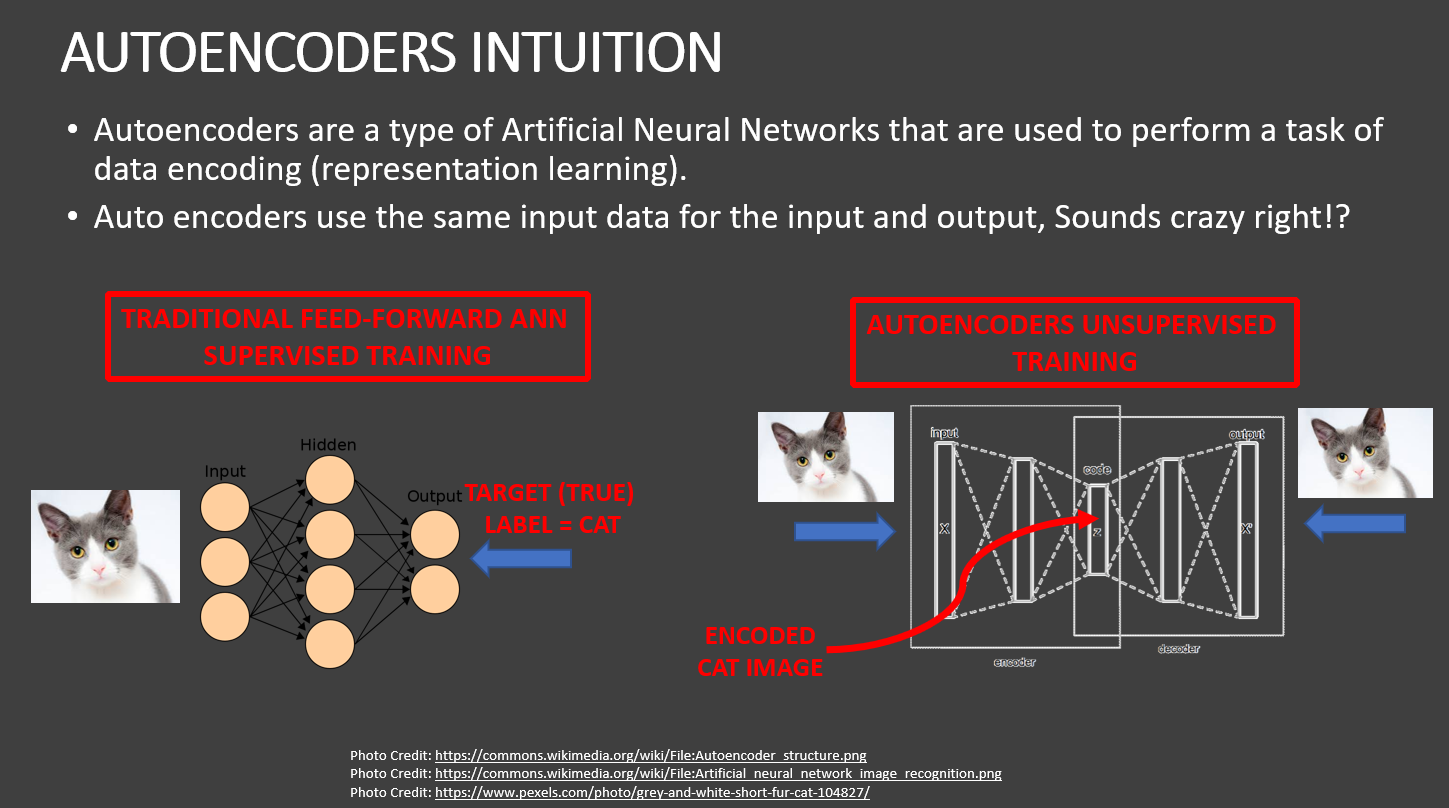

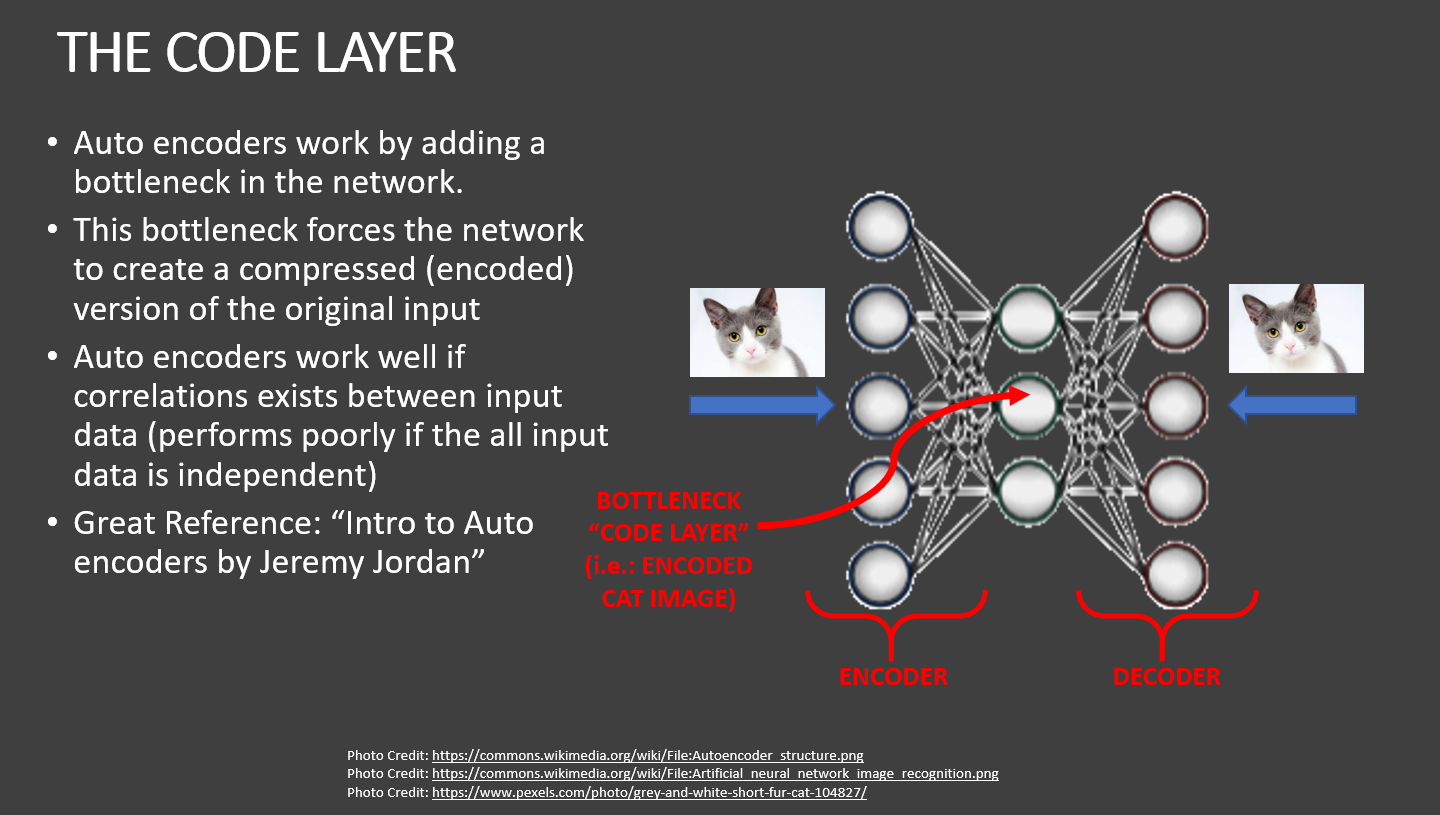

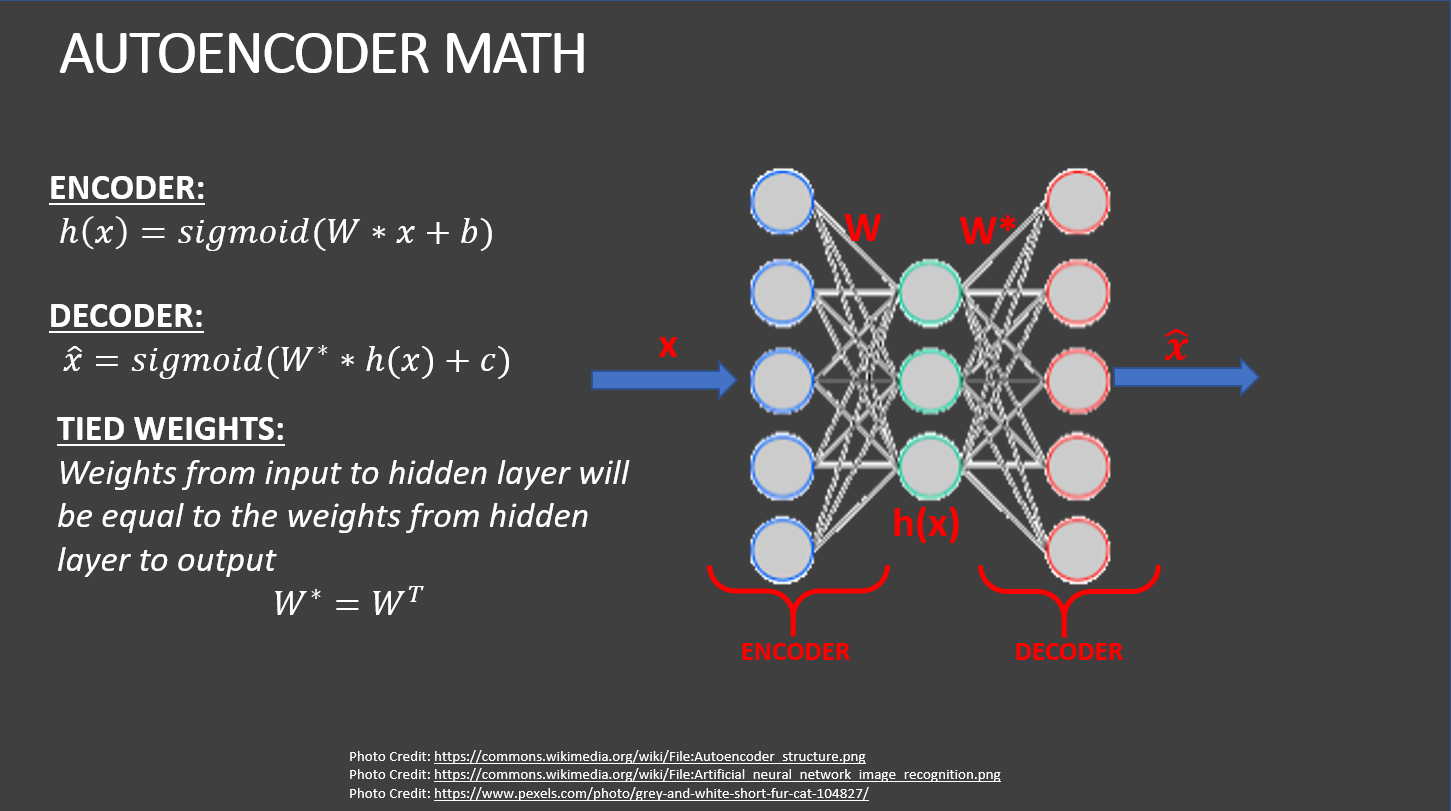

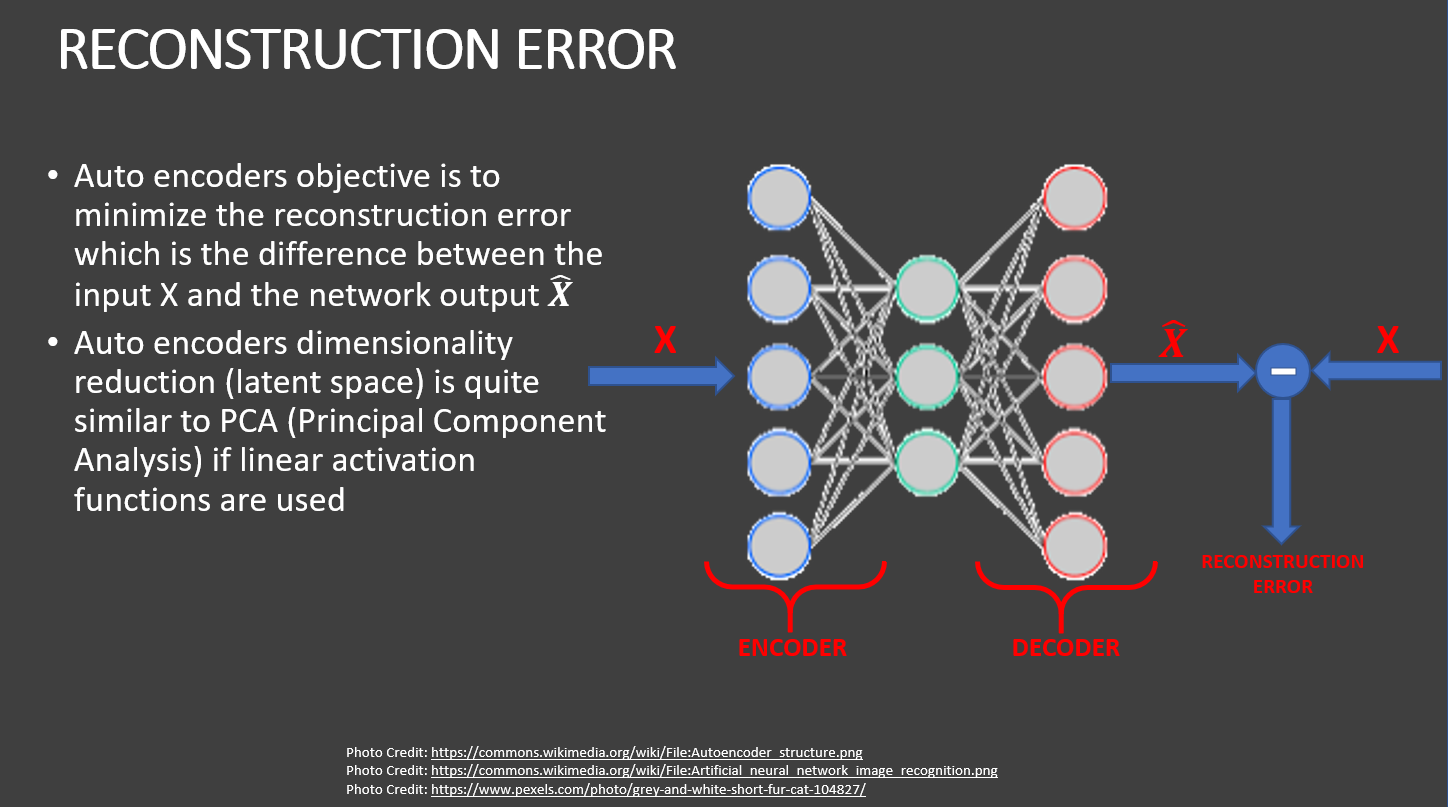

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [18]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =2, padding = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 12, kernel_size = 3, strides =2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 12, kernel_size = 3, strides =1, padding = 'same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides =2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides =2, padding = 'same', activation='sigmoid'))

In [19]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 12)          1740      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 12)          1308      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       1744      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 5,097
Trainable params: 5,097
Non-trainabl

In [20]:
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      min_delta = 0.001, 
                                      patience = 20,
                                      restore_best_weights=True)

In [21]:
history =autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 50,
               batch_size = 200,
               validation_data = (noise_dataset_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)),
               callbacks= cb)

Epoch 1/50
300/300 [==============================] - 9s 28ms/step - loss: 0.3852 - accuracy: 0.4978 - val_loss: 0.3181 - val_accuracy: 0.5057
Epoch 2/50
300/300 [==============================] - 8s 26ms/step - loss: 0.3091 - accuracy: 0.5085 - val_loss: 0.3070 - val_accuracy: 0.5065
Epoch 3/50
300/300 [==============================] - 8s 25ms/step - loss: 0.3022 - accuracy: 0.5090 - val_loss: 0.3021 - val_accuracy: 0.5069
Epoch 4/50
300/300 [==============================] - 8s 25ms/step - loss: 0.2984 - accuracy: 0.5093 - val_loss: 0.2994 - val_accuracy: 0.5071
Epoch 5/50
300/300 [==============================] - 8s 25ms/step - loss: 0.2964 - accuracy: 0.5094 - val_loss: 0.2979 - val_accuracy: 0.5072
Epoch 6/50
300/300 [==============================] - 8s 25ms/step - loss: 0.2952 - accuracy: 0.5095 - val_loss: 0.2969 - val_accuracy: 0.5073
Epoch 7/50
300/300 [==============================] - 8s 25ms/step - loss: 0.2944 - accuracy: 0.5095 - val_loss: 0.2962 - val_accuracy: 0.5073

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [22]:
loss = history.history['loss'];
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = list(range(0,len(loss)))

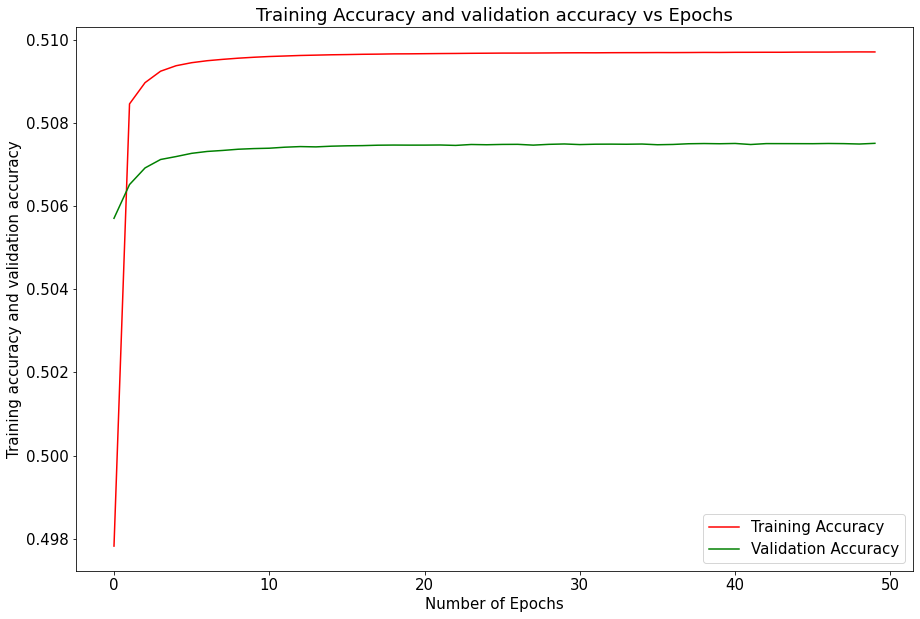

In [23]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':15})
plt.plot(epochs,accuracy,'r-',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'g-',label = 'Validation Accuracy')
plt.title('Training Accuracy and validation accuracy vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Training accuracy and validation accuracy')
plt.legend()

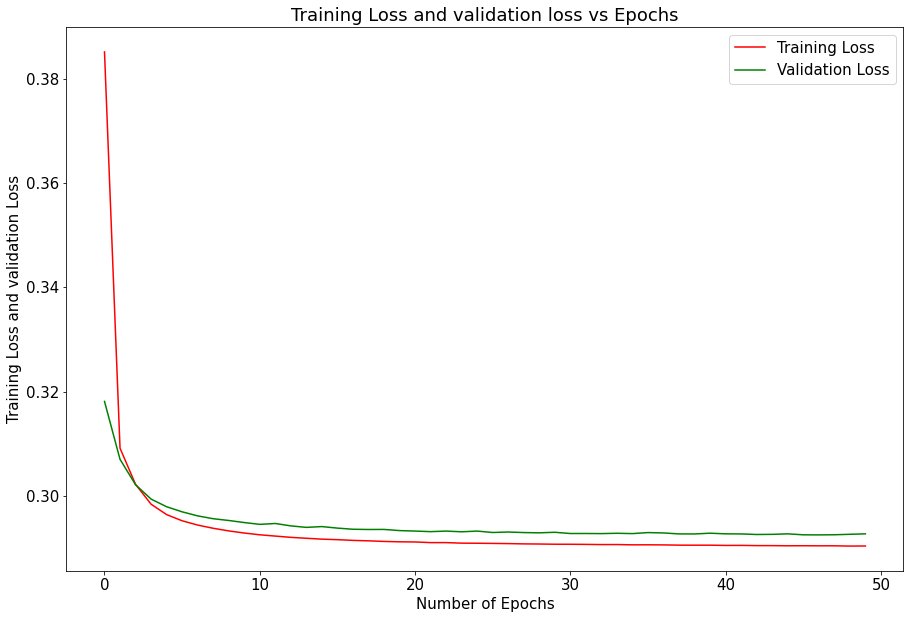

In [24]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':15})
plt.plot(epochs,loss,'r-',label='Training Loss')
plt.plot(epochs,val_loss,'g-',label = 'Validation Loss')
plt.title('Training Loss and validation loss vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss and validation Loss')
plt.legend()

In [25]:
result = autoencoder.evaluate(noise_dataset_test.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1))

313/313 [==============================] - 1s 2ms/step - loss: 0.2927 - accuracy: 0.5075


In [26]:
print('Accuracy : {:.2f}%'.format(result[1]*100))

Accuracy : 50.75%


In [27]:
predicted = autoencoder.predict(noise_dataset_test.reshape(-1,28,28,1))

313/313 [==============================] - 1s 2ms/step


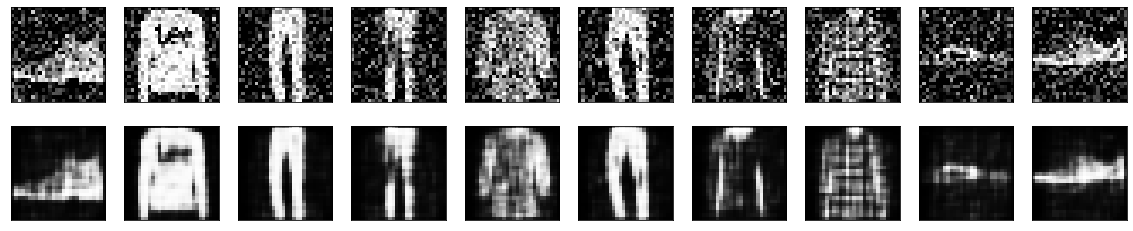

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot